## Сбор данных из Drom.ru
### Парсим HTML код страниц с обьявлениями о продаже машин. Записываем ссылки на отдельные обявления в файл auto_hrefs_data.txt

In [3]:
import requests
from bs4 import BeautifulSoup

headers = {"user-agent": "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.152 YaBrowser/21.2.2.102 Yowser/2.5 Safari/537.36"}

auto_href_list = []
start = 1
finish = 100

with open('auto_hrefs_data.txt', 'w', encoding="utf-8") as file:
    while start < finish:
        try:
            for page_num in range(start, finish):
                url1 = 'https://moscow.drom.ru/auto/used/all/page'
                url2 = '/?frametype[]=10&frametype[]=1&frametype[]=11&distance=100'
                url = url1 + str(page_num) + url2
                response = requests.get(url, headers = headers)
                soup = BeautifulSoup(response.text, 'lxml')

                divs =  soup.find("div", class_="css-1nvf6xk eojktn00")

                hrefs = divs.find_all('a')

                for auto in hrefs:

                    auto_href = auto.get('href')
                    if 'auto/used' not in auto_href:
                        print(auto_href)
                        file.write(auto_href + '\n')

                if page_num >= finish - 1:
                    start = finish
        except:
            print(url)
            start = page_num
            if page_num >= finish - 1:
                start = finish
            
            

https://auto.ru/moskva/cars/used/?body_type_group=COUPE&body_type_group=SEDAN&body_type_group=CABRIO&page=11


### Открываем файл auto_hrefs_data.txt и начинаем по очереди открывать все объявления и записывать нужные данные в файл auto_data.csv

In [1]:
import requests
from bs4 import BeautifulSoup

headers = {"user-agent": "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.152 YaBrowser/21.2.2.102 Yowser/2.5 Safari/537.36"}

auto_href_list = []
start = 0

with open('auto_hrefs_data.txt', 'r') as file:
    auto_hrefs = file.readlines()


finish = len(auto_hrefs)
    
with open('auto_data.csv', 'w', encoding="cp1251") as file:
    file.write('AutoName;Year;AutoURL;Price;Fuel;EngineCapacity;HorsePower;Mileage')
    while start < finish:
        try:
            for href_num in range(start, finish):

                url = auto_hrefs[href_num][:-1]
                response_auto = requests.get(url, headers = headers)
                soup_auto = BeautifulSoup(response_auto.text, 'lxml')
                
                auto_data = []
                div_price =  soup_auto.find("div", class_="css-eazmxc e162wx9x0")
                if div_price is not None:
                    price_l = div_price.get_text().split()
                    price = ''.join(price_l[:-1])

                    # имя
                    auto_name =  soup_auto.find("span", class_="css-1kb7l9z e162wx9x0")
                    auto_name_list = auto_name.get_text().split(', ')
                    auto_data.append(auto_name_list[0].replace('Продажа ', ''))

                    # Год    
                    auto_data.append(auto_name_list[1][:4])

                    # Ссылка
                    auto_data.append(url)

                    # Цена
                    auto_data.append(price)

                    table_TTX =  soup_auto.find("table", class_="css-xalqz7 eppj3wm0")
                    table_TTX_body = table_TTX.tbody

                    # Двигатель
                    dviglo = table_TTX_body.find("span", class_="css-1jygg09 e162wx9x0").get_text()

                    ## тип топлива
                    dviglo_list = dviglo.split(', ')
                    auto_data.append(dviglo_list[0])

                    # Мощность
                    power = table_TTX_body.find("span", class_="css-9g0qum e162wx9x0").get_text()
                    auto_data.append(power.split()[0])

                    # Пробег
                    probeg = table_TTX_body.find("span", class_="css-1osyw3j ei6iaw00").get_text()
                    auto_data.append(''.join(probeg.split()))

                    auto_data1 = ';'.join(auto_data)
                    
                    file.write(auto_data1 + '\n')

                if href_num >= finish - 1:
                    start = finish
        except:
            print(url)
            start = href_num +1
            if href_num >= finish - 1:
                start = finish
            
            

https://moscow.drom.ru/bmw/3-series/50805753.html
https://moscow.drom.ru/kia/optima/50813897.html
https://moscow.drom.ru/toyota/corolla/50901586.html
https://moscow.drom.ru/mazda/mazda3/50907661.html
https://moscow.drom.ru/bentley/continental_gt/50674252.html
https://moscow.drom.ru/volvo/s80/50602610.html
https://moscow.drom.ru/volkswagen/polo/50800419.html
https://moscow.drom.ru/toyota/camry/50840628.html
https://moscow.drom.ru/kia/rio/50840975.html
https://moscow.drom.ru/audi/a6/49207453.html
https://moscow.drom.ru/mercedes-benz/e-class/50526059.html
https://moscow.drom.ru/kia/optima/50527057.html
https://moscow.drom.ru/bmw/3-series/50916277.html
https://moscow.drom.ru/genesis/g70/50530736.html
https://moscow.drom.ru/volkswagen/polo/50913605.html
https://moscow.drom.ru/hyundai/solaris/50534169.html
https://moscow.drom.ru/mazda/mazda3/50542874.html
https://moscow.drom.ru/kia/k5/50532183.html
https://moscow.drom.ru/porsche/taycan/49476442.html
https://moscow.drom.ru/kia/rio/50913081.ht

## Предварительныя обработка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')  # стиль для графиков

import seaborn as sns

In [2]:
df = pd.read_csv("auto_data.csv", encoding = "cp1251", sep=';', comment='#')
df.head()

,Auto_Name,Year,Auto_URL,Price,Fuel,HorsePower,Mileage
0,Лада 2107,2008,https://pushkino.drom.ru/lada/2107/50899875.html,45000,бензин,76,55858
1,Москвич 403,1963,https://moscow.drom.ru/moskvitch/403/50130207....,47000,бензин,45,25380
2,Лада 2105,2003,https://moscow.drom.ru/lada/2105/50918627.html,47000,бензин,71,50000
3,Лада 2115 Самара,2003,https://chehov.drom.ru/lada/2115/50146925.html,49000,бензин,76,200000
4,Лада 21099,2002,https://korolev.drom.ru/lada/21099/50913242.html,50000,бензин,78,145000


### Типы данных в каждом из столбцов

In [3]:
df.dtypes

Auto_Name     object
Year           int64
Auto_URL      object
Price          int64
Fuel          object
HorsePower     int64
Mileage       object
dtype: object

### Информация о пропусках в каждом из столбцов

In [4]:
df.isnull().sum()

Auto_Name     0
Year          0
Auto_URL      0
Price         0
Fuel          0
HorsePower    0
Mileage       0
dtype: int64

### Mileage - Пробег нужно перевести в тип данных int64, на данный момент он в статусе object из за строк где есть записи типа: "хххх,безпробегапоРФ". На основе этого поля можно создать новый признак с информацией о пробеге в РФ или нет


In [5]:
df['MileageType'] = np.where('безпробегапоРФ' in df['Mileage'], 'Без пробега по РФ', 'C пробега по РФ')

In [6]:
df.head()

,Auto_Name,Year,Auto_URL,Price,Fuel,HorsePower,Mileage,MileageType
0,Лада 2107,2008,https://pushkino.drom.ru/lada/2107/50899875.html,45000,бензин,76,55858,C пробега по РФ
1,Москвич 403,1963,https://moscow.drom.ru/moskvitch/403/50130207....,47000,бензин,45,25380,C пробега по РФ
2,Лада 2105,2003,https://moscow.drom.ru/lada/2105/50918627.html,47000,бензин,71,50000,C пробега по РФ
3,Лада 2115 Самара,2003,https://chehov.drom.ru/lada/2115/50146925.html,49000,бензин,76,200000,C пробега по РФ
4,Лада 21099,2002,https://korolev.drom.ru/lada/21099/50913242.html,50000,бензин,78,145000,C пробега по РФ


### Удаляем хвосты с, без пробега по РФ и переводим в в тип int64

In [7]:
df['Mileage'] = df['Mileage'].str.replace(',безпробегапоРФ', '')

In [8]:
df.head()

,Auto_Name,Year,Auto_URL,Price,Fuel,HorsePower,Mileage,MileageType
0,Лада 2107,2008,https://pushkino.drom.ru/lada/2107/50899875.html,45000,бензин,76,55858,C пробега по РФ
1,Москвич 403,1963,https://moscow.drom.ru/moskvitch/403/50130207....,47000,бензин,45,25380,C пробега по РФ
2,Лада 2105,2003,https://moscow.drom.ru/lada/2105/50918627.html,47000,бензин,71,50000,C пробега по РФ
3,Лада 2115 Самара,2003,https://chehov.drom.ru/lada/2115/50146925.html,49000,бензин,76,200000,C пробега по РФ
4,Лада 21099,2002,https://korolev.drom.ru/lada/21099/50913242.html,50000,бензин,78,145000,C пробега по РФ


In [9]:
df['Mileage'] = df['Mileage'].astype('int64')

In [10]:
df.head()

,Auto_Name,Year,Auto_URL,Price,Fuel,HorsePower,Mileage,MileageType
0,Лада 2107,2008,https://pushkino.drom.ru/lada/2107/50899875.html,45000,бензин,76,55858,C пробега по РФ
1,Москвич 403,1963,https://moscow.drom.ru/moskvitch/403/50130207....,47000,бензин,45,25380,C пробега по РФ
2,Лада 2105,2003,https://moscow.drom.ru/lada/2105/50918627.html,47000,бензин,71,50000,C пробега по РФ
3,Лада 2115 Самара,2003,https://chehov.drom.ru/lada/2115/50146925.html,49000,бензин,76,200000,C пробега по РФ
4,Лада 21099,2002,https://korolev.drom.ru/lada/21099/50913242.html,50000,бензин,78,145000,C пробега по РФ


In [11]:
df.tail()

,Auto_Name,Year,Auto_URL,Price,Fuel,HorsePower,Mileage,MileageType
938,Mercedes-Benz S-Class,2021,https://moscow.drom.ru/mercedes-benz/s-class/5...,12800000,дизель,249,12000,C пробега по РФ
939,Audi A8,2021,https://moscow.drom.ru/audi/a8/49869591.html,14165116,бензин,460,20400,C пробега по РФ
940,Audi R8,2020,https://moscow.drom.ru/audi/r8/50909580.html,15300000,бензин,620,30000,C пробега по РФ
941,Mercedes-Benz S-Class,2022,https://moscow.drom.ru/mercedes-benz/s-class/5...,16290000,бензин,503,18000,C пробега по РФ
942,Mercedes-Benz S-Class,2022,https://moscow.drom.ru/mercedes-benz/s-class/5...,24500000,бензин,503,21,C пробега по РФ


In [13]:
df.dtypes

Auto_Name      object
Year            int64
Auto_URL       object
Price           int64
Fuel           object
HorsePower      int64
Mileage         int64
MileageType    object
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Auto_Name    943 non-null    object
 1   Year         943 non-null    int64 
 2   Auto_URL     943 non-null    object
 3   Price        943 non-null    int64 
 4   Fuel         943 non-null    object
 5   HorsePower   943 non-null    int64 
 6   Mileage      943 non-null    int64 
 7   MileageType  943 non-null    object
dtypes: int64(4), object(4)
memory usage: 59.1+ KB


In [15]:
df.describe(include=np.object)

C:\Users\karle\AppData\Local\Temp/ipykernel_11648/3211851552.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=np.object)


,Auto_Name,Auto_URL,Fuel,MileageType
count,943,943,943,943
unique,169,943,2,1
top,Volkswagen Polo,https://pushkino.drom.ru/lada/2107/50899875.html,бензин,C пробега по РФ
freq,63,1,881,943


In [16]:
df.describe()

,Year,Price,HorsePower,Mileage
count,943.000000,9.430000e+02,943.000000,943.000000
mean,2012.539767,1.626419e+06,168.373277,138167.758218
std,7.925091,1.894003e+06,86.208756,97657.341269
min,1952.000000,4.500000e+04,45.000000,13.000000
25%,2008.000000,5.820000e+05,110.000000,72559.000000
50%,2014.000000,1.199000e+06,150.000000,119788.000000
75%,2019.000000,1.950000e+06,194.000000,188050.000000
max,2023.000000,2.450000e+07,625.000000,999999.000000


### Визуальный анализ

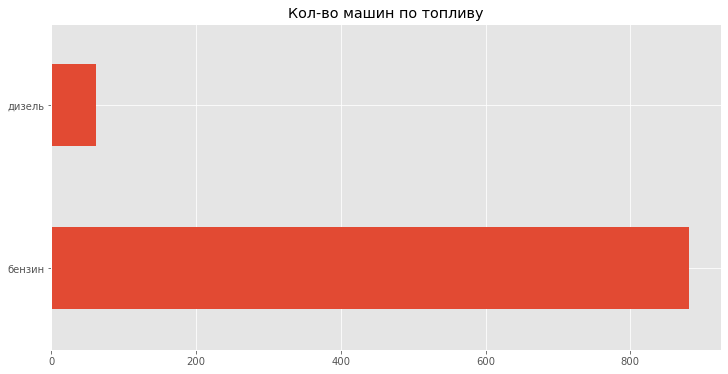

In [17]:
.value_counts().plot(kind='barh', figsize = (12, 6))
plt.title('Кол-во машин по топливу')
plt.show()

### На диаграме видно что бензиновых машин в 14 раз больше чем дизельных

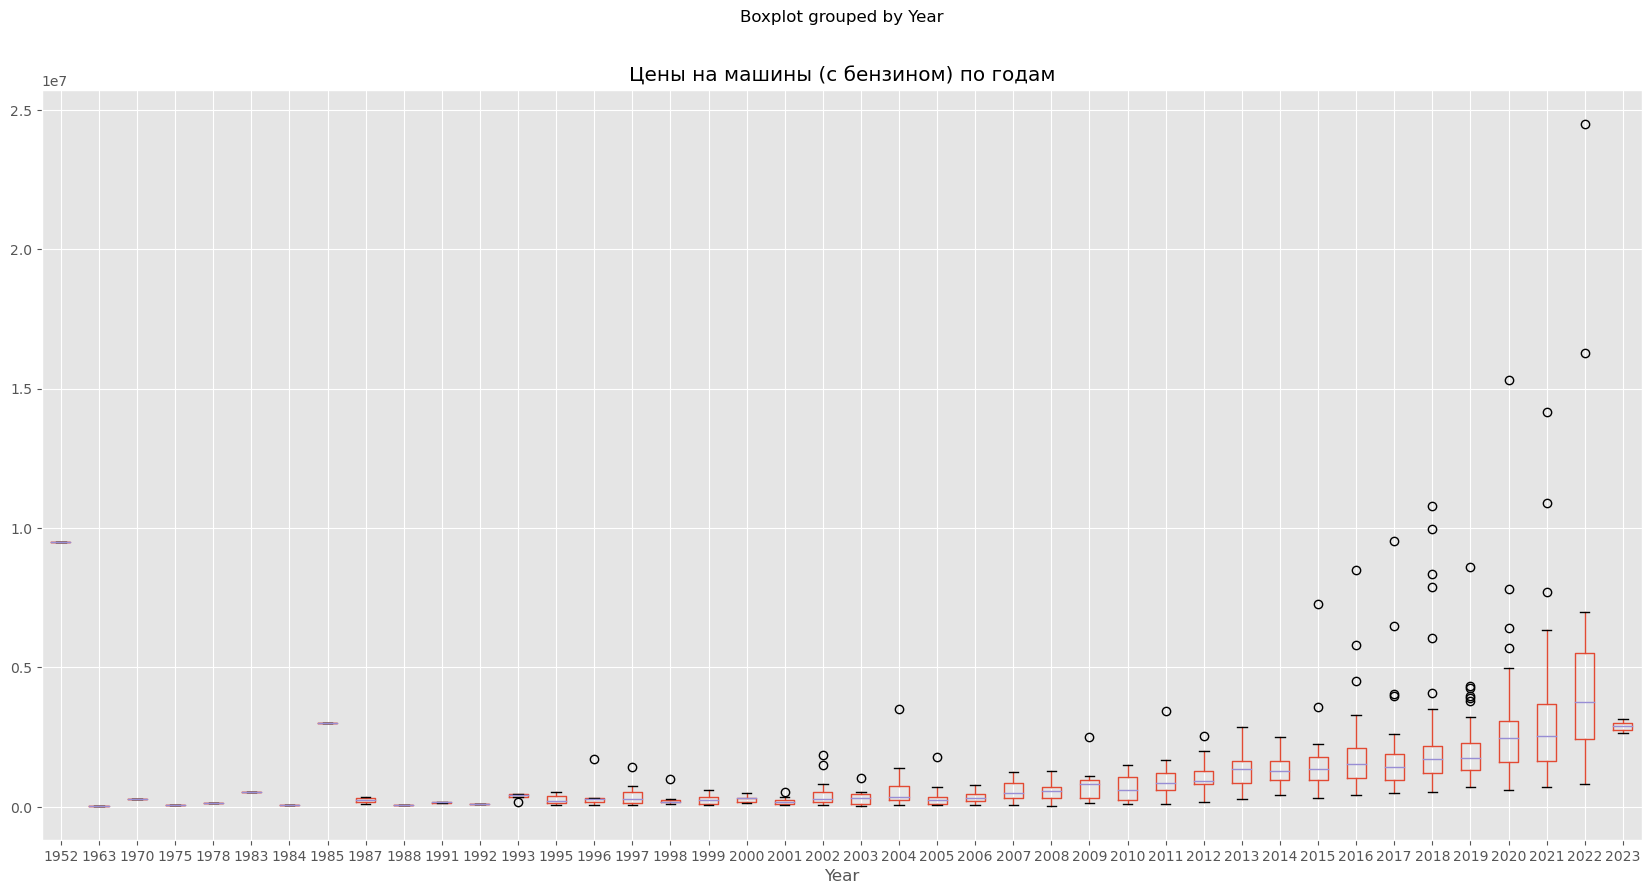

In [29]:
df[ df['Fuel']=='бензин' ].boxplot(by='Year', column = 'Price',
          figsize = (20, 10))
plt.title('Цены на машины (с бензином) по годам')
plt.show()

### Из графика можно сделать вывод что чем новее машина тем она дороже

(array([ 21., 133., 232., 172., 116., 117.,  28.,  38.,  13.,  23.,   6.,
         12.,   6.,   9.,   5.,   3.,   4.,   0.,   2.,   3.]),
 array([ 45.,  74., 103., 132., 161., 190., 219., 248., 277., 306., 335.,
        364., 393., 422., 451., 480., 509., 538., 567., 596., 625.]),
 <BarContainer object of 20 artists>)

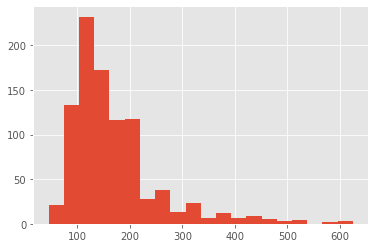

In [21]:
plt.hist(df['HorsePower'], bins = 20)

### Из графика можно заметить что большинство машин имеют 150 лошадиных сил

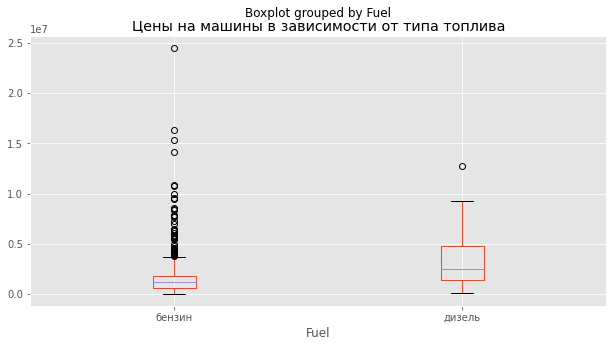

In [26]:
df.boxplot(by='Fuel', column = 'Price',
          figsize = (10, 5))
plt.title('Цены на машины в зависимости от типа топлива')
plt.show()

### Из вышеприведенного графика можно сделать вывод, что большинство машин с типом топлива бензин дешевле чем машины на дизельном топливе.

(array([ 99., 112., 176., 146., 107., 109.,  59.,  48.,  30.,  14.,  24.,
          7.,   2.,   3.,   4.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.30000000e+01, 3.33458667e+04, 6.66787333e+04, 1.00011600e+05,
        1.33344467e+05, 1.66677333e+05, 2.00010200e+05, 2.33343067e+05,
        2.66675933e+05, 3.00008800e+05, 3.33341667e+05, 3.66674533e+05,
        4.00007400e+05, 4.33340267e+05, 4.66673133e+05, 5.00006000e+05,
        5.33338867e+05, 5.66671733e+05, 6.00004600e+05, 6.33337467e+05,
        6.66670333e+05, 7.00003200e+05, 7.33336067e+05, 7.66668933e+05,
        8.00001800e+05, 8.33334667e+05, 8.66667533e+05, 9.00000400e+05,
        9.33333267e+05, 9.66666133e+05, 9.99999000e+05]),
 <BarContainer object of 30 artists>)

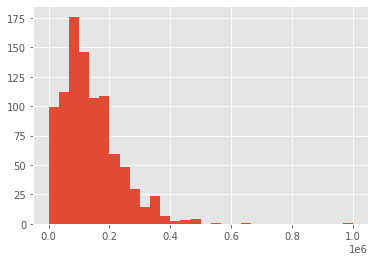

In [27]:
plt.hist(df['Mileage'], bins = 30)

### Из графика можно сделать вывод что большинство машин имеют пробег в районе 200000

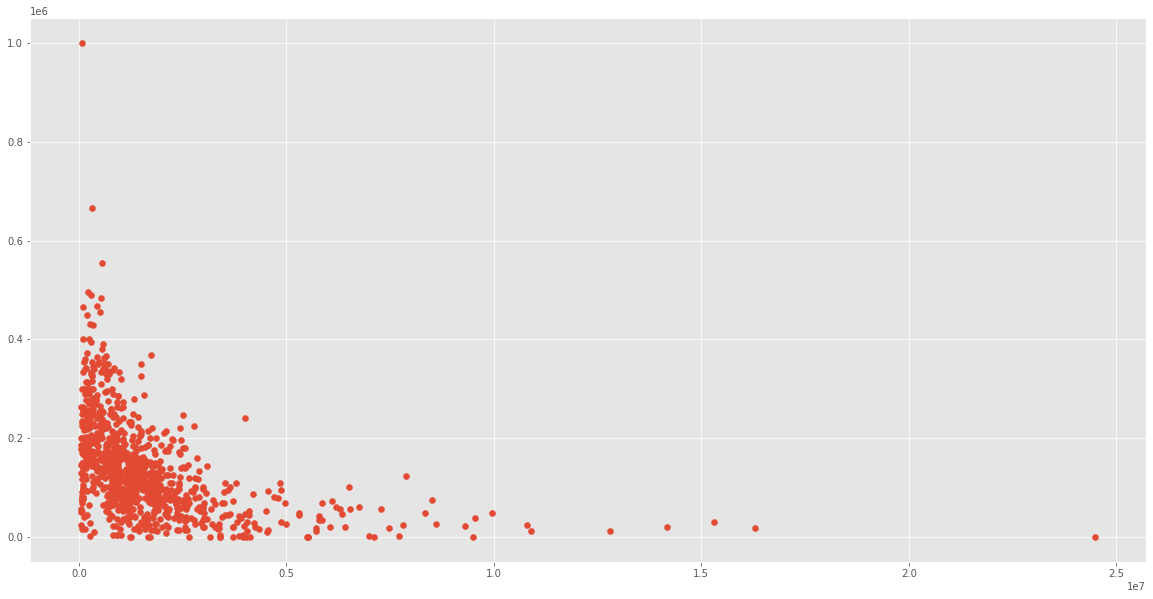

In [29]:
plt.figure(figsize = (20, 10))
plt.scatter(df.Price, df.Mileage)
plt.show()

### Из графика можно сделать вывод что чем меньше пробег тем больше цена.

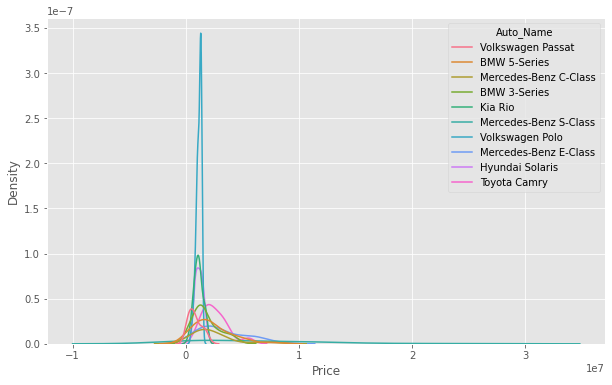

In [30]:
top = df.groupby('Auto_Name').Price.count().nlargest(10)
top = pd.DataFrame(data = top)
top = top.reset_index()
top = list(top['Auto_Name'])
top = df[df['Auto_Name'].isin(top)]
sns_plot = sns.kdeplot(data=top, x='Price', hue='Auto_Name')
fig = sns_plot.get_figure()
fig.set_figheight(6)
fig.set_figwidth(10)